# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Training Data

In [2]:
df_train = pd.read_csv("../files/data/TWIN/CORNER_CRACK_COUNTERSUNK_HOLE/TWIN_CORNER_CRACK_CS2_QUARTER_ELLIPSE_PART_6_TRAIN.csv")
df_train

,c_index,W/R,a1/c1,a1/t,a2/c2,a2/t,r/t,b/t,phi_1,phi_2,K1-T,K2-T,K1-B,K2-B,K1-P,K2-P
0,2.0,4.0,0.1,0.1,0.1,0.2,3.0,0.5,0.057913,0.057913,0.835466,0.956349,0.659676,0.879178,0.289895,0.286941
1,2.0,4.0,0.1,0.1,0.1,0.2,3.0,0.5,0.069369,0.069369,0.850470,0.973558,0.670569,0.892885,0.295149,0.292108
2,2.0,4.0,0.1,0.1,0.1,0.2,3.0,0.5,0.080826,0.080826,0.868526,0.994226,0.683860,0.909736,0.301425,0.298391
3,2.0,4.0,0.1,0.1,0.1,0.2,3.0,0.5,0.092282,0.092282,0.888835,1.017361,0.698791,0.928704,0.308557,0.305526
4,2.0,4.0,0.1,0.1,0.1,0.2,3.0,0.5,0.103739,0.103739,0.910781,1.042656,0.714907,0.949201,0.316242,0.313210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609979,10000.0,40.0,10.0,0.5,10.0,0.5,1.0,0.5,1.467061,1.467061,2.199449,2.199449,-0.011005,-0.011005,0.557053,0.557053
3609980,10000.0,40.0,10.0,0.5,10.0,0.5,1.0,0.5,1.478518,1.478518,2.165522,2.165522,-0.012116,-0.012116,0.548382,0.548382
3609981,10000.0,40.0,10.0,0.5,10.0,0.5,1.0,0.5,1.489974,1.489974,2.138806,2.138806,-0.013117,-0.013117,0.541614,0.541614
3609982,10000.0,40.0,10.0,0.5,10.0,0.5,1.0,0.5,1.501431,1.501431,2.117189,2.117189,-0.013996,-0.013996,0.536226,0.536226


In [3]:
# Get unique combinations of the first four columns
CC_combinations = df_train.iloc[:, 1:8].drop_duplicates().to_numpy()

print(len(CC_combinations))

28203


In [4]:
print("Different W/r values: ", np.unique(CC_combinations[:,0], axis=0))
print("Different a1/c1 values: ", np.unique(CC_combinations[:,1], axis=0))
print("Different a1/t values: ", np.unique(CC_combinations[:,2], axis=0))
print("Different a2/c2 values: ", np.unique(CC_combinations[:,3], axis=0))
print("Different a2/t values: ", np.unique(CC_combinations[:,4], axis=0))
print("Different r/t values: ", np.unique(CC_combinations[:,5], axis=0))
print("Different b/t values: ", np.unique(CC_combinations[:,6], axis=0))

Different W/r values:  [ 2.6  4.  30.  40. ]
Different a1/c1 values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a1/t values:  [0.1 0.2 0.3 0.4 0.5]
Different a2/c2 values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a2/t values:  [0.1 0.2 0.3 0.4 0.5]
Different r/t values:  [1.  1.5 2.  3. ]
Different b/t values:  [0.5]


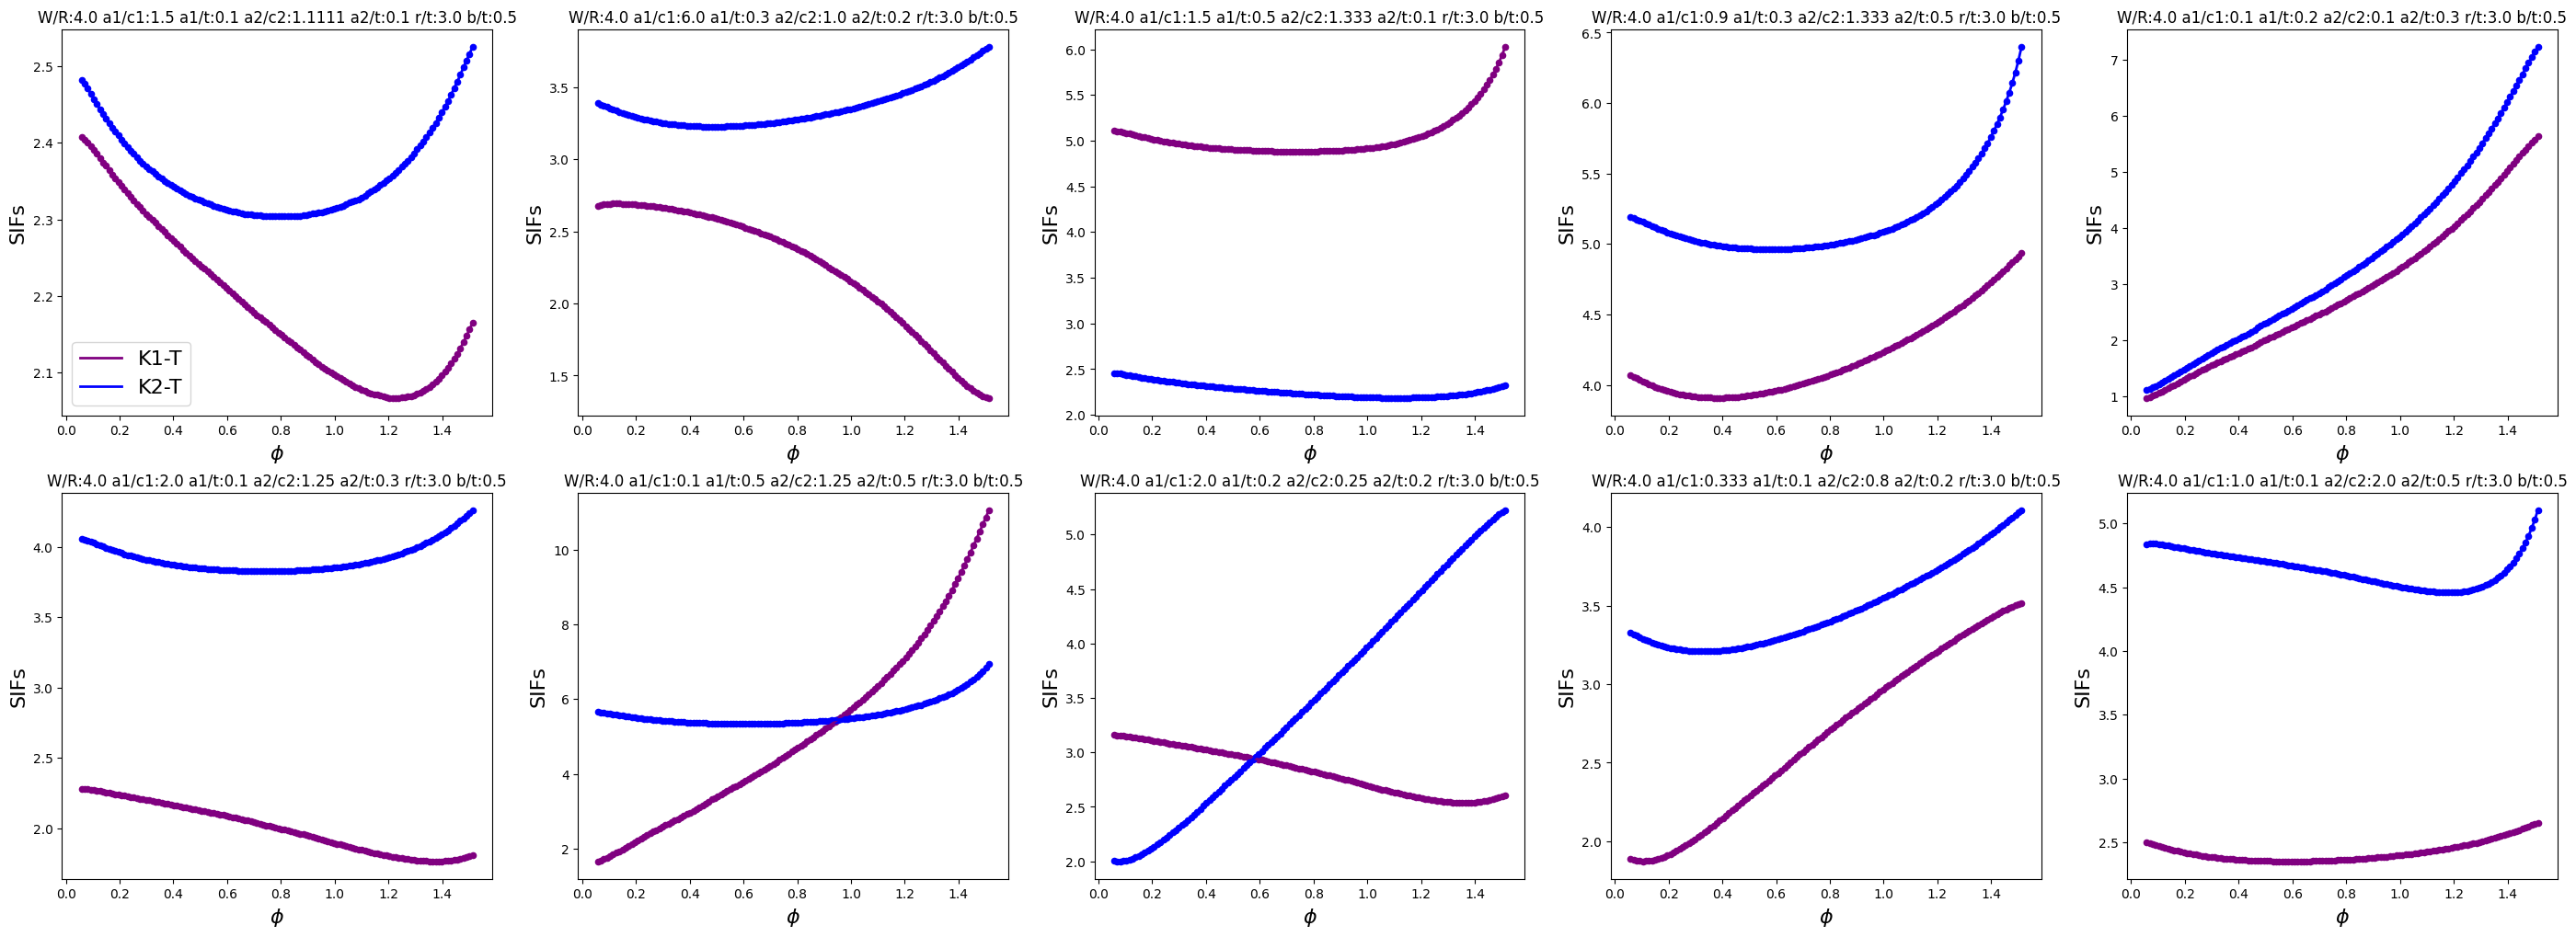

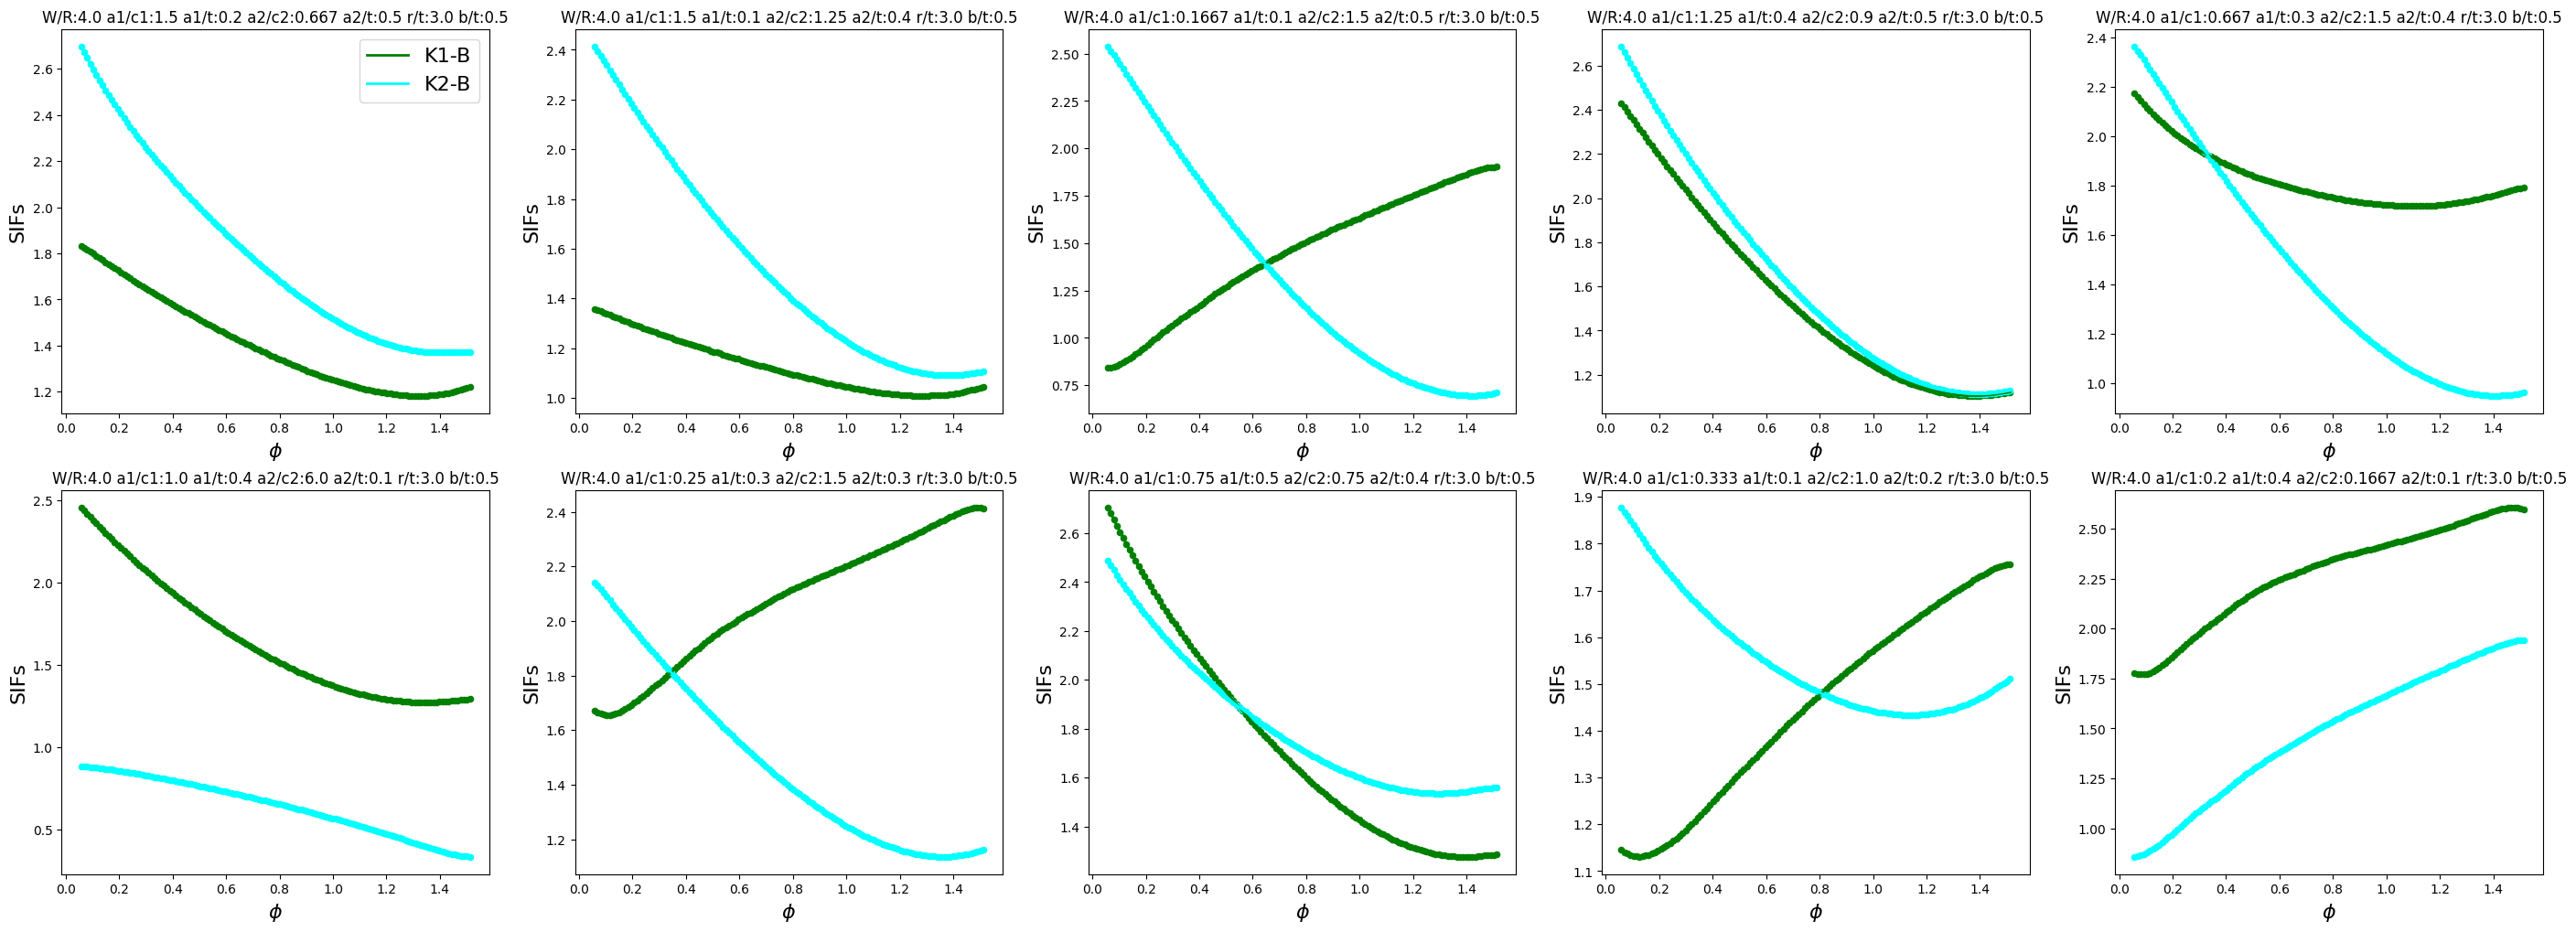

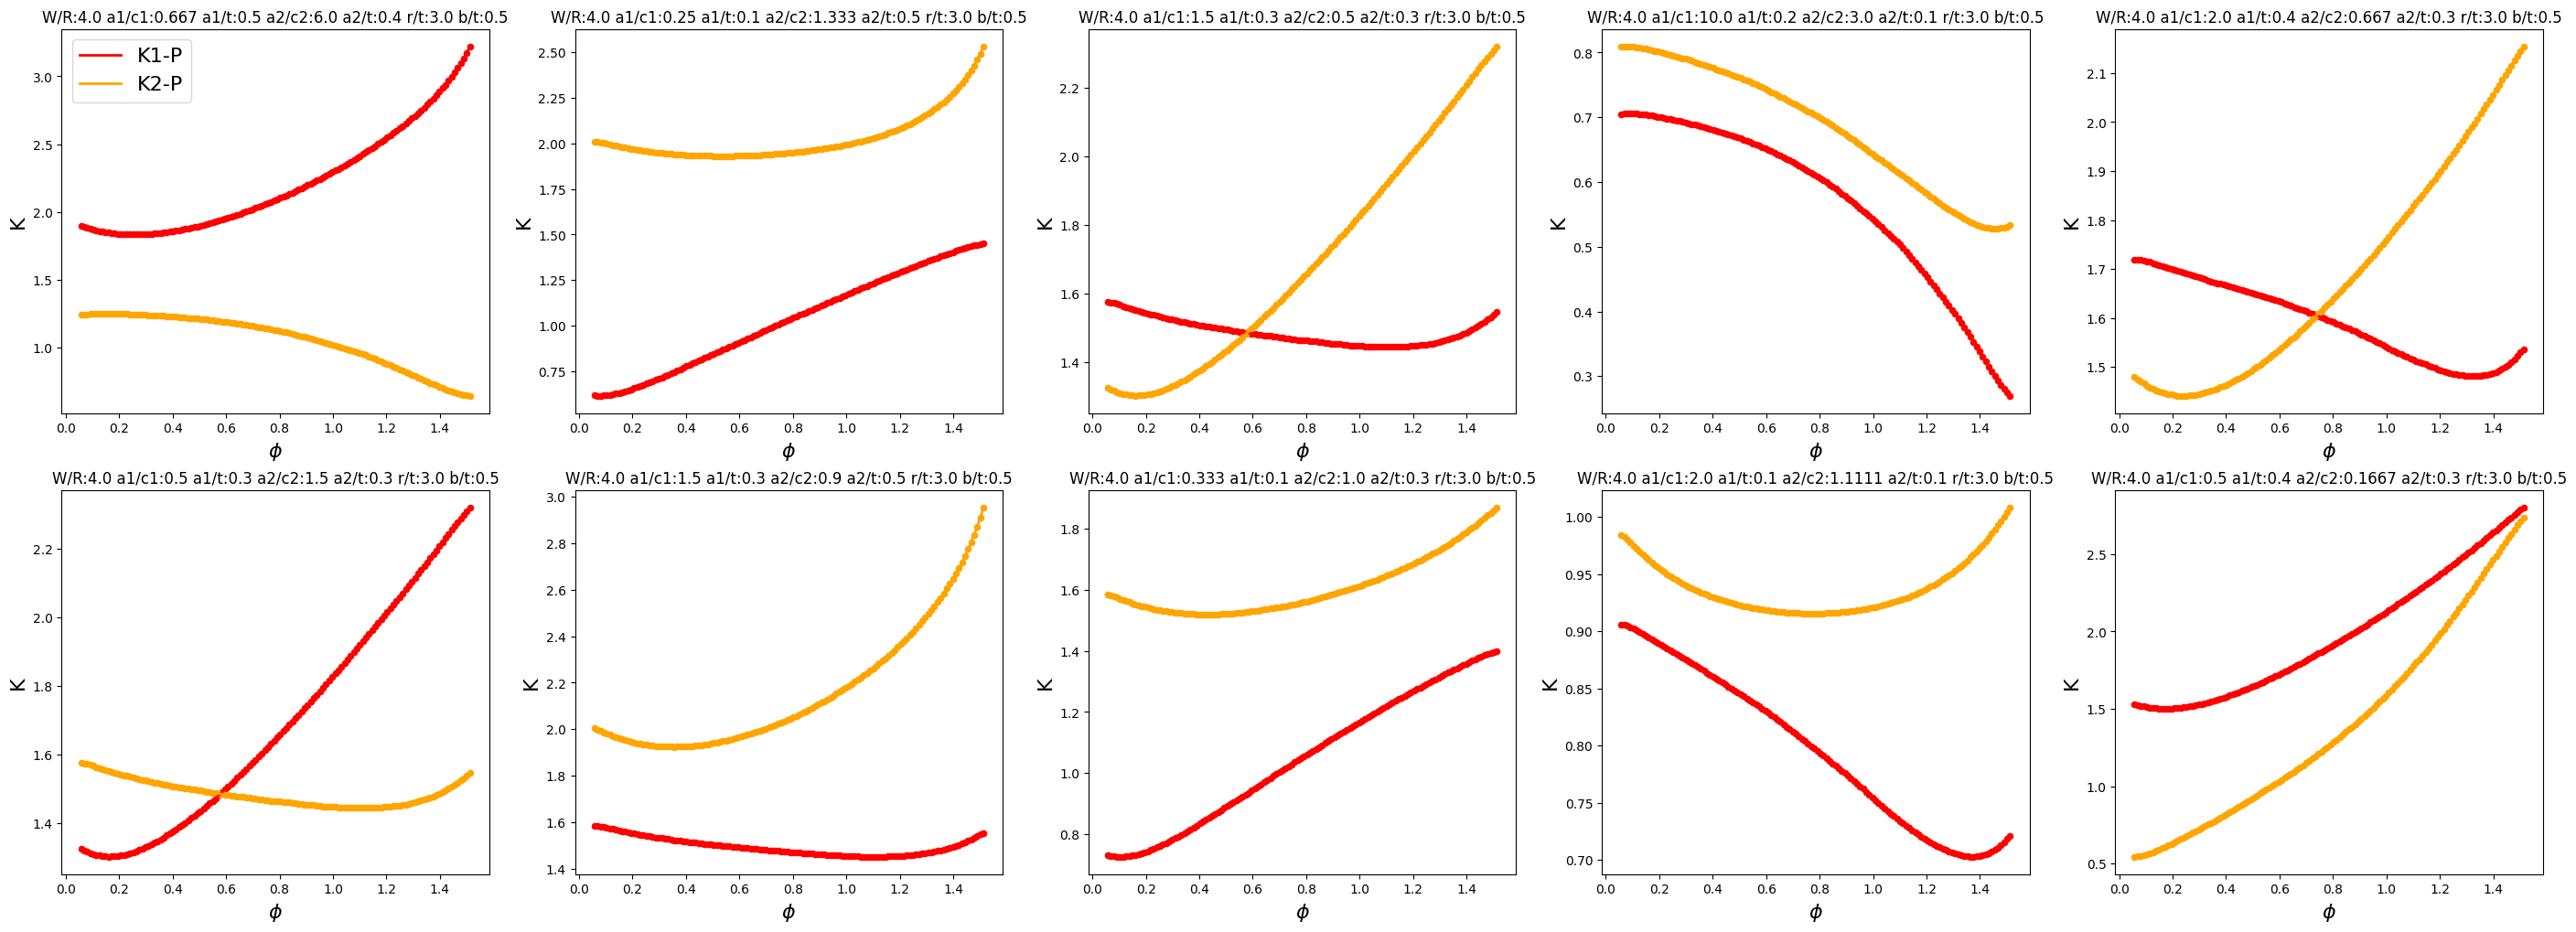

In [5]:
d = df_train.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(100)
fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-6], label="K1-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-6], color='purple', s=20)

        axs[i,j].plot(data[:,-7], data[:,-5], label="K2-T", color='blue', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-5], color='blue', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("SIFs", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()


fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-4], label="K1-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-4], color='green', s=20)

        axs[i,j].plot(data[:,-7], data[:,-3], label="K2-B", color='cyan', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-3], color='cyan', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("SIFs", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-2], label="K1-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-2], color='red', s=20)

        axs[i,j].plot(data[:,-7], data[:,-1], label="K2-P", color='orange', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-1], color='orange', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

# Testing Data

In [6]:
df_test = pd.read_csv("../files/data/TWIN/CORNER_CRACK_COUNTERSUNK_HOLE/TWIN_CORNER_CRACK_CS2_QUARTER_ELLIPSE_PART_6_TEST.csv")
df_test

,c_index,W/R,a1/c1,a1/t,a2/c2,a2/t,r/t,b/t,phi_1,phi_2,K1-T,K2-T,K1-B,K2-B,K1-P,K2-P
0,1.0,4.0,0.1,0.1,0.1,0.1,3.0,0.5,0.057913,0.057913,0.830370,0.830370,0.656679,0.656679,0.288102,0.288102
1,1.0,4.0,0.1,0.1,0.1,0.1,3.0,0.5,0.069369,0.069369,0.845270,0.845270,0.667563,0.667563,0.293249,0.293249
2,1.0,4.0,0.1,0.1,0.1,0.1,3.0,0.5,0.080826,0.080826,0.863255,0.863255,0.680702,0.680702,0.299531,0.299531
3,1.0,4.0,0.1,0.1,0.1,0.1,3.0,0.5,0.092282,0.092282,0.883413,0.883413,0.695587,0.695587,0.306595,0.306595
4,1.0,4.0,0.1,0.1,0.1,0.1,3.0,0.5,0.103739,0.103739,0.905235,0.905235,0.711676,0.711676,0.314244,0.314244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198843,9994.0,40.0,10.0,0.5,6.0,0.4,1.0,0.5,1.467061,1.467061,2.200533,2.477841,-0.010804,0.333462,0.557153,0.633555
1198844,9994.0,40.0,10.0,0.5,6.0,0.4,1.0,0.5,1.478518,1.478518,2.165969,2.457188,-0.011921,0.329345,0.548482,0.628476
1198845,9994.0,40.0,10.0,0.5,6.0,0.4,1.0,0.5,1.489974,1.489974,2.138757,2.440394,-0.012927,0.325947,0.541714,0.624383
1198846,9994.0,40.0,10.0,0.5,6.0,0.4,1.0,0.5,1.501431,1.501431,2.117189,2.429686,-0.013806,0.323414,0.536326,0.621524


In [7]:
# Get unique combinations of the first four columns
CC_combinations = df_test.iloc[:, 1:8].drop_duplicates().to_numpy()

print(len(CC_combinations))

9366


In [8]:
print("Different W/r values: ", np.unique(CC_combinations[:,0], axis=0))
print("Different a1/c1 values: ", np.unique(CC_combinations[:,1], axis=0))
print("Different a1/t values: ", np.unique(CC_combinations[:,2], axis=0))
print("Different a2/c2 values: ", np.unique(CC_combinations[:,3], axis=0))
print("Different a2/t values: ", np.unique(CC_combinations[:,4], axis=0))
print("Different r/t values: ", np.unique(CC_combinations[:,5], axis=0))
print("Different b/t values: ", np.unique(CC_combinations[:,6], axis=0))

Different W/r values:  [ 2.6  4.  30.  40. ]
Different a1/c1 values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a1/t values:  [0.1 0.2 0.3 0.4 0.5]
Different a2/c2 values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a2/t values:  [0.1 0.2 0.3 0.4 0.5]
Different r/t values:  [1.  1.5 2.  3. ]
Different b/t values:  [0.5]


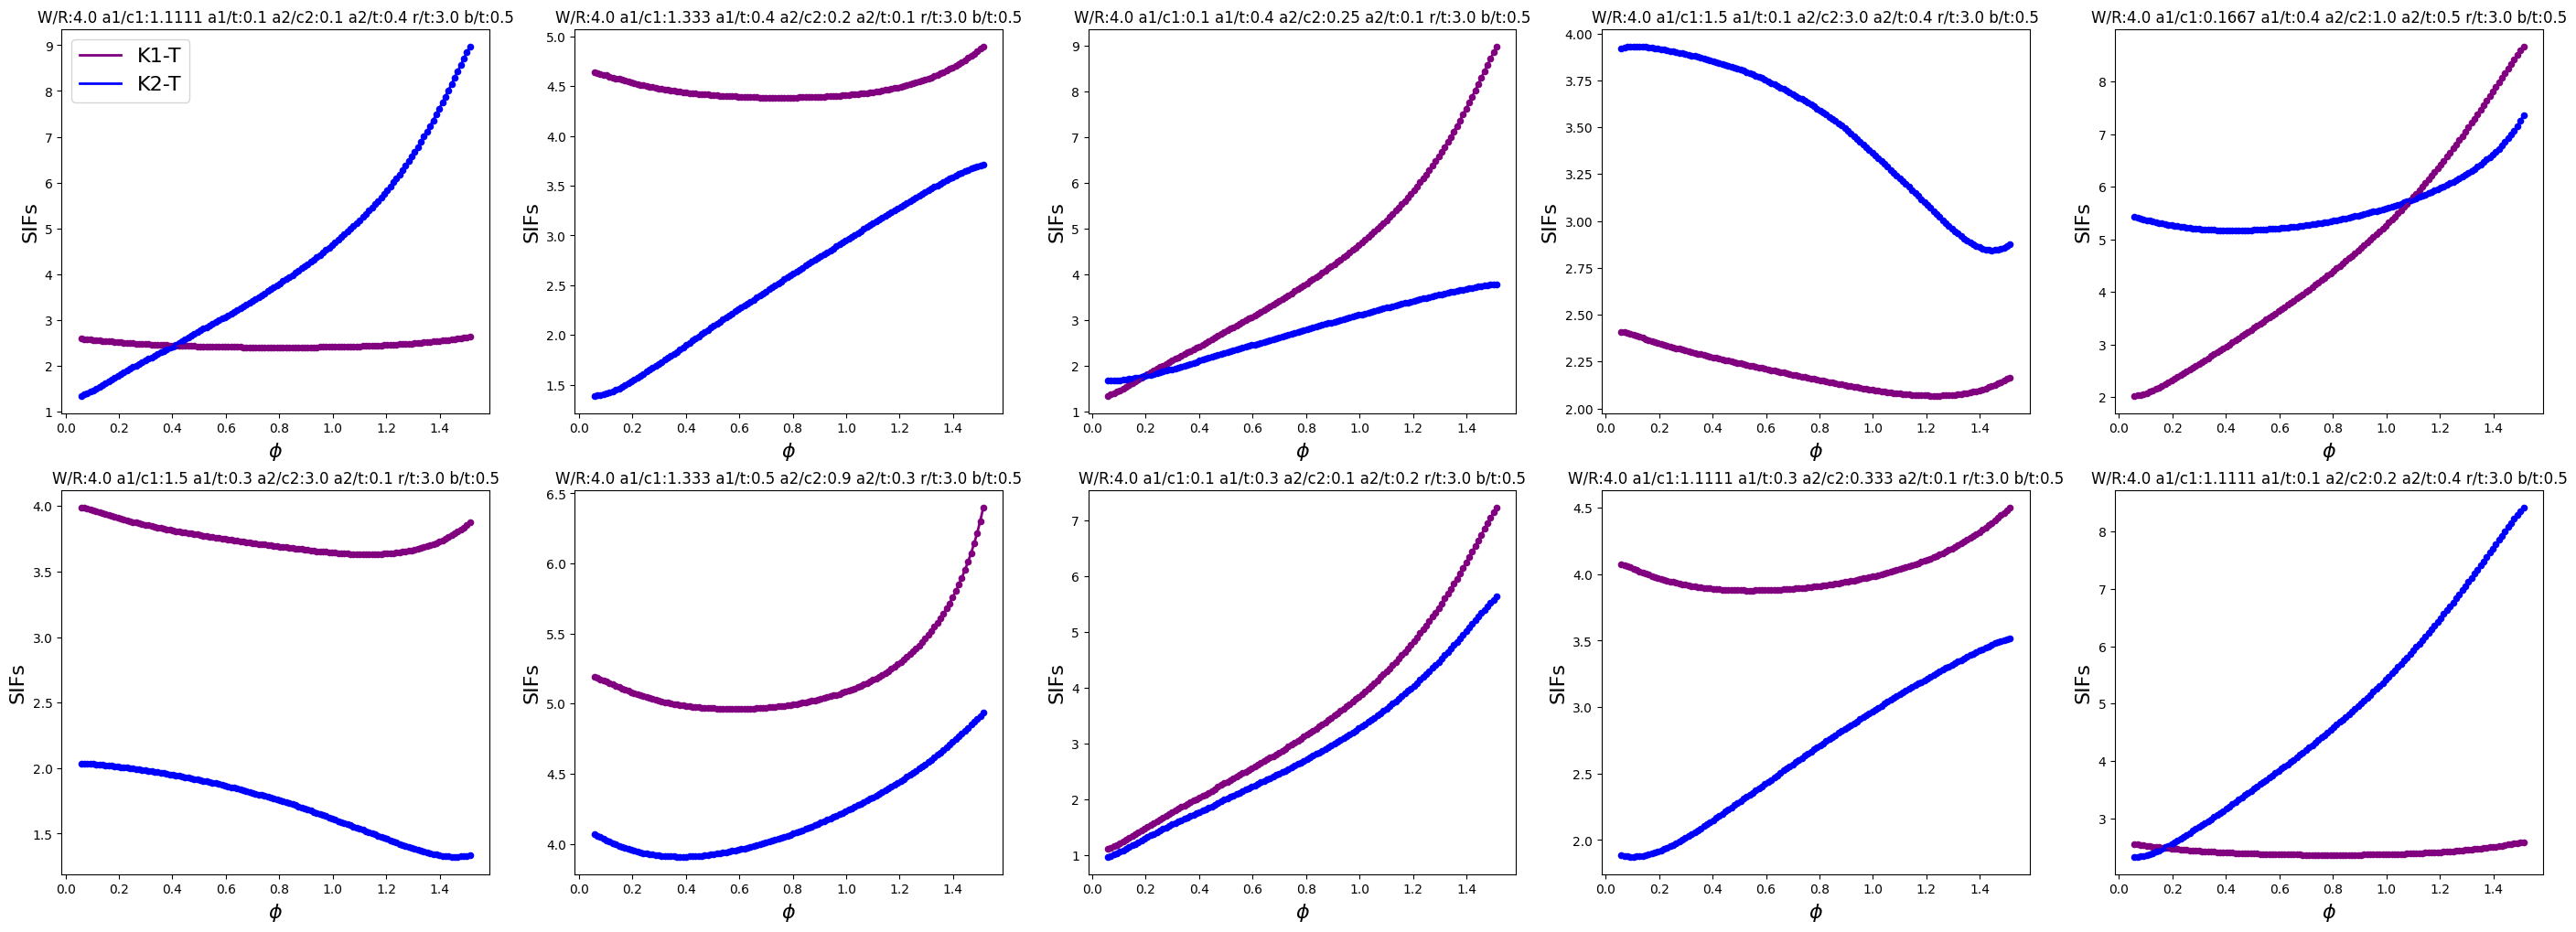

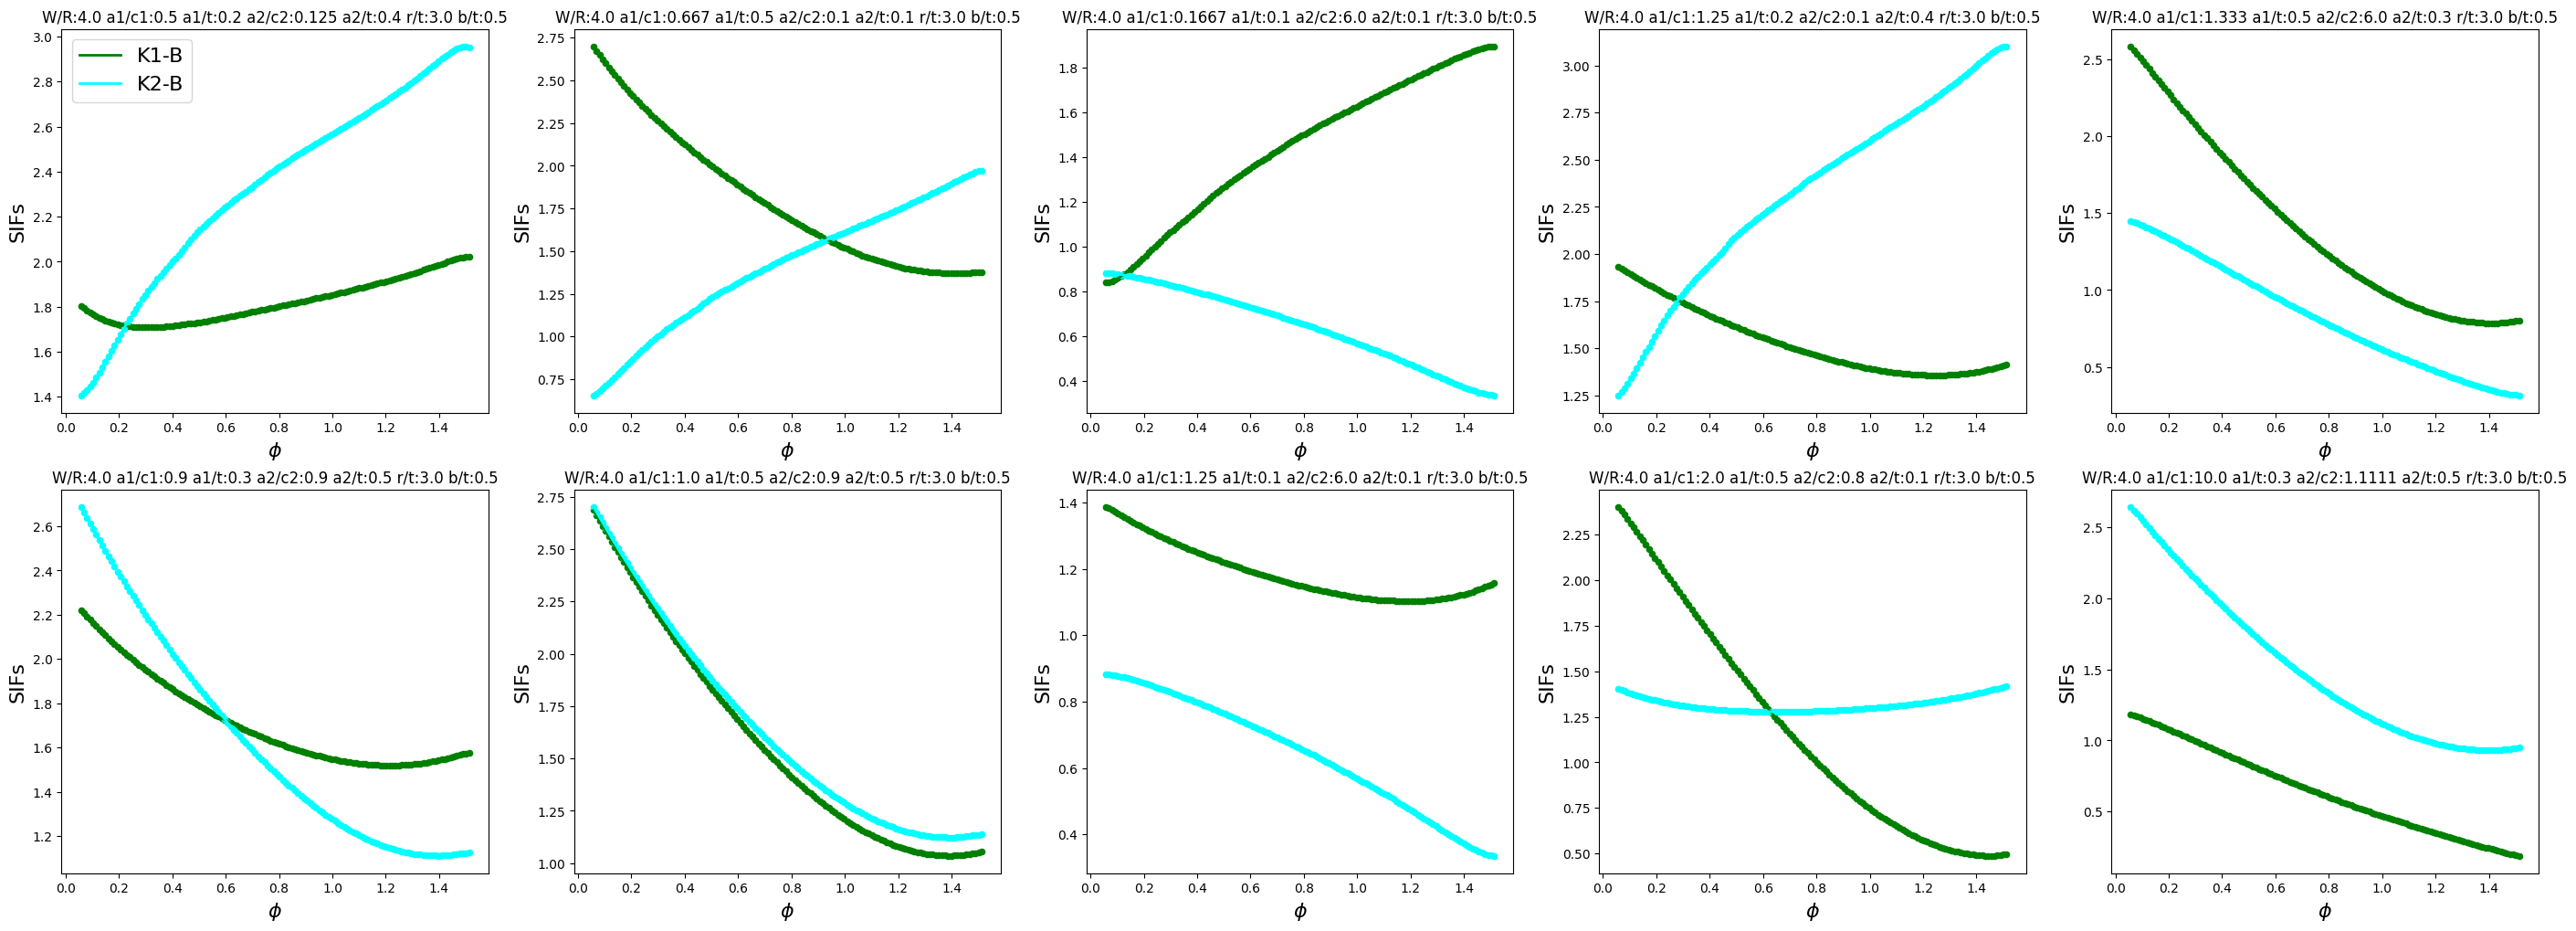

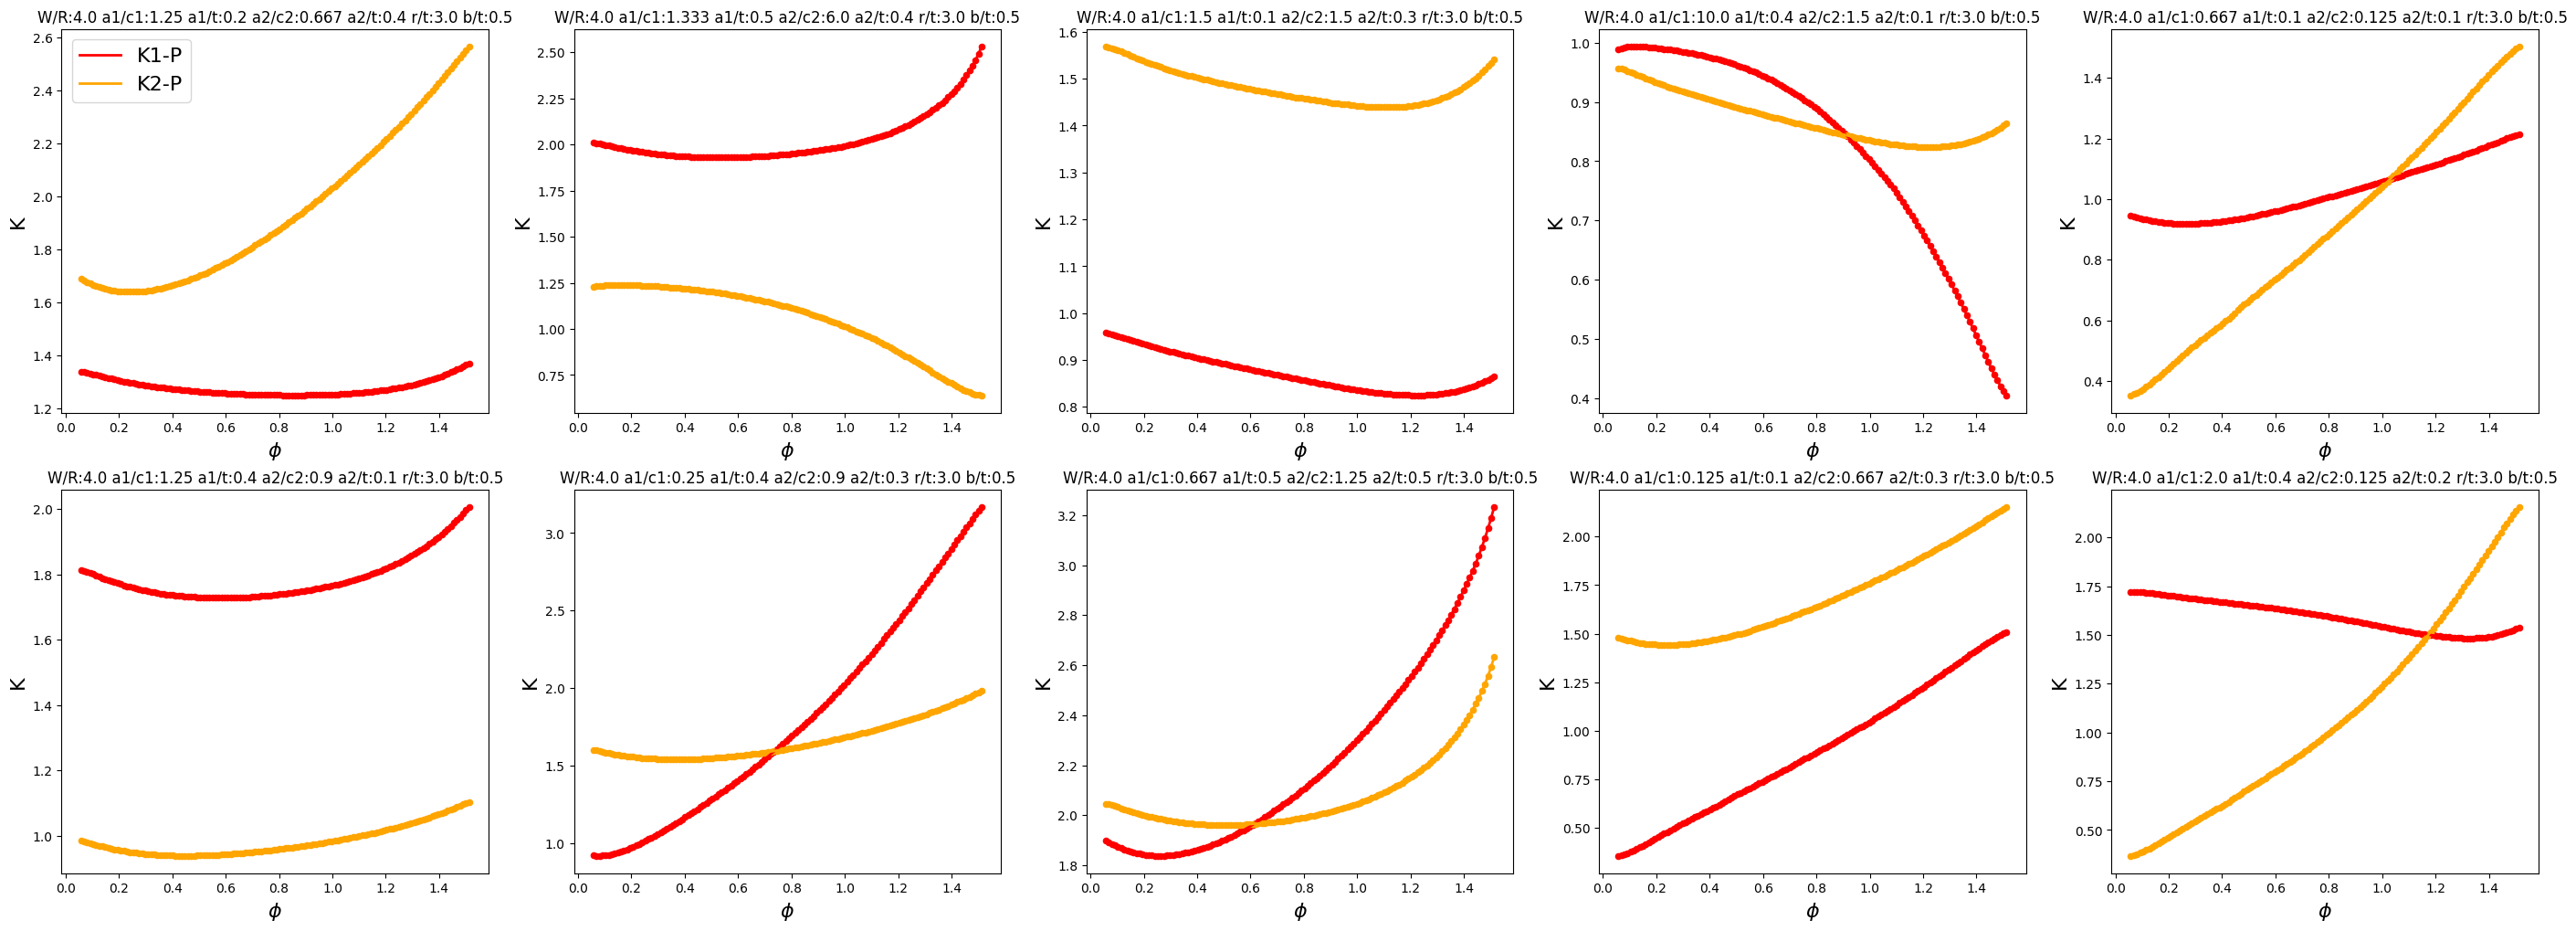

In [9]:
d = df_test.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(100)
fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-6], label="K1-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-6], color='purple', s=20)

        axs[i,j].plot(data[:,-7], data[:,-5], label="K2-T", color='blue', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-5], color='blue', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("SIFs", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()


fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-4], label="K1-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-4], color='green', s=20)

        axs[i,j].plot(data[:,-7], data[:,-3], label="K2-B", color='cyan', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-3], color='cyan', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("SIFs", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

fig, axs = plt.subplots(2, 5, figsize=(35,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a1_c1 = np.unique(data[:,2])
        a1_t = np.unique(data[:,3])
        a2_c2 = np.unique(data[:,4])
        a2_t = np.unique(data[:,5])
        r_t = np.unique(data[:,6])
        b_t = np.unique(data[:,7])

        assert len(W_R) == 1
        assert len(a1_c1) == 1
        assert len(a1_t) == 1
        assert len(a2_c2) == 1
        assert len(a2_t) == 1
        assert len(r_t) == 1
        assert len(b_t) == 1

        axs[i,j].plot(data[:,-8], data[:,-2], label="K1-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-8], data[:,-2], color='red', s=20)

        axs[i,j].plot(data[:,-7], data[:,-1], label="K2-P", color='orange', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-7], data[:,-1], color='orange', s=20)

        axs[i,j].set_title("W/R:{} a1/c1:{} a1/t:{} a2/c2:{} a2/t:{} r/t:{} b/t:{}".format(W_R[0], a1_c1[0], a1_t[0], a2_c2[0], a2_t[0], r_t[0], b_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()